<a href="https://colab.research.google.com/github/sabaribabu12345/HCP-PERSONA/blob/main/FEATURE_ENG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [546]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder,LabelEncoder

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.preprocessing import StandardScaler, PowerTransformer, OneHotEncoder

from sklearn.metrics import silhouette_score

In [547]:
Potential_data=pd.read_csv('Potential_Data.csv')
Npt_data=pd.read_csv('NPT_Data.csv')
Ems_data=pd.read_csv('EMS_Data.csv')
Digital_data=pd.read_csv('Digital_Data.csv')
Compass_data=pd.read_csv('Compass_Data.csv')
Call_data=pd.read_csv('Call_Data_Jan23_Feb24.csv',encoding='cp1252')


# EMS Data Cleaning

In [548]:
df1=Ems_data.copy()
df1.head()

,CLUSTER_NAME,BRAND,START_DATE,MONTH_START_DATE,CON_CRM_ID,DATE_TILL,EVENTS,HONORARIUM,OBJECTIVE,EMS_NUMBER,TOPIC,ROLE,TYPE,SPEAKER_CATEGORY,USER_ID
0,KERALA,TECENTRIQ,19-Jan-23,1-Jan-23,7qZtCB0,7-Feb-24,1,22750,To Establish the benefit of Tec+,EMIN-202301-0006,NaN,Speaker,RIPE,Expert 3,30105228.0
1,ANDHRA PRADESH AND TELANGANA,TECENTRIQ,27-Jan-23,1-Jan-23,8NxC0LK,7-Feb-24,1,21000,To Make the attendees aware of +,EMIN-202301-0015,NaN,Speaker,RIPE,Expert 3,30190186.0
2,KERALA,TECENTRIQ,19-Jan-23,1-Jan-23,7qZtCB0,7-Feb-24,1,22750,To Establish the benefit of Tec+,EMIN-202301-0006,NaN,Speaker,RIPE,Expert 3,30098713.0
3,GUJARAT,TECENTRIQ,26-Jan-23,1-Jan-23,29bkrtQ,7-Feb-24,1,17500,To establish Tecentriq in adjuv+,EMIN-202301-0010,NaN,Panelist,RIPE,Expert 3,30167383.0
4,GUJARAT,TECENTRIQ,26-Jan-23,1-Jan-23,29bkrtQ,7-Feb-24,1,17500,To establish Tecentriq in adjuv+,EMIN-202301-0010,NaN,Panelist,RIPE,Expert 3,30076476.0


In [549]:
df1.isnull().sum()

CLUSTER_NAME           0
BRAND                  0
START_DATE             0
MONTH_START_DATE       0
CON_CRM_ID            45
DATE_TILL              0
EVENTS                 0
HONORARIUM             0
OBJECTIVE              0
EMS_NUMBER             0
TOPIC               3078
ROLE                   0
TYPE                   0
SPEAKER_CATEGORY       0
USER_ID              198
dtype: int64

In [550]:
df1.dropna(subset="CON_CRM_ID",inplace=True)
df1.isnull().sum()

CLUSTER_NAME           0
BRAND                  0
START_DATE             0
MONTH_START_DATE       0
CON_CRM_ID             0
DATE_TILL              0
EVENTS                 0
HONORARIUM             0
OBJECTIVE              0
EMS_NUMBER             0
TOPIC               3033
ROLE                   0
TYPE                   0
SPEAKER_CATEGORY       0
USER_ID              153
dtype: int64

In [551]:
df1.drop(["USER_ID","OBJECTIVE","TOPIC"],axis=1,inplace=True)

In [552]:
df1.drop_duplicates(inplace=True)
df1.shape

(1557, 12)

In [553]:
df1.drop_duplicates()

,CLUSTER_NAME,BRAND,START_DATE,MONTH_START_DATE,CON_CRM_ID,DATE_TILL,EVENTS,HONORARIUM,EMS_NUMBER,ROLE,TYPE,SPEAKER_CATEGORY
0,KERALA,TECENTRIQ,19-Jan-23,1-Jan-23,7qZtCB0,7-Feb-24,1,22750,EMIN-202301-0006,Speaker,RIPE,Expert 3
1,ANDHRA PRADESH AND TELANGANA,TECENTRIQ,27-Jan-23,1-Jan-23,8NxC0LK,7-Feb-24,1,21000,EMIN-202301-0015,Speaker,RIPE,Expert 3
3,GUJARAT,TECENTRIQ,26-Jan-23,1-Jan-23,29bkrtQ,7-Feb-24,1,17500,EMIN-202301-0010,Panelist,RIPE,Expert 3
5,GUJARAT,TECENTRIQ,26-Jan-23,1-Jan-23,7qc5WAk,7-Feb-24,1,17500,EMIN-202301-0010,Panelist,RIPE,Expert 3
8,GUJARAT,TECENTRIQ,26-Jan-23,1-Jan-23,7qekET4,7-Feb-24,1,35000,EMIN-202301-0010,Moderator,RIPE,Expert 1
...,...,...,...,...,...,...,...,...,...,...,...,...
3070,KARNATAKA,VABYSMO,11-Jan-24,1-Jan-24,00AE8An,7-Feb-24,1,42000,EMIN-202312-0046,Panelist,RIPE,Expert 1
3071,KARNATAKA,VABYSMO,11-Jan-24,1-Jan-24,01F1Uxf,7-Feb-24,1,42000,EMIN-202312-0046,Panelist,RIPE,Expert 1
3072,KARNATAKA,VABYSMO,11-Jan-24,1-Jan-24,01eb7UF,7-Feb-24,1,42000,EMIN-202312-0046,Speaker,RIPE,Expert 1
3073,TAMIL NADU,VABYSMO,7-Feb-24,1-Feb-24,002Z1zC,7-Feb-24,1,21000,EMIN-202402-0006,Speaker,RIPE,Expert 3


In [554]:
id_counts = Ems_data.groupby(['CON_CRM_ID']).size()

In [555]:

series = pd.Series(id_counts, name='NO_OF_EVENT_ATTENDED')

df = pd.DataFrame(series)
df=df.reset_index()
print(df)


    CON_CRM_ID  NO_OF_EVENT_ATTENDED
0      000OE2J                     2
1      000S0jO                     1
2      000XVJ8                     1
3      000reM9                     3
4      000vLyD                     1
..         ...                   ...
738    D5nAdRP                     1
739    E6f24YG                     1
740    Eb7JGm4                     2
741    EezpdHg                     2
742    T8JDng9                     1

[743 rows x 2 columns]


In [556]:
df.sample(5)

,CON_CRM_ID,NO_OF_EVENT_ATTENDED
114,01yoM99,1
415,7qc83sI,6
644,8NuneSQ,9
628,8Nsx3KE,4
655,8NvBVRy,1


In [557]:
df.describe()

,NO_OF_EVENT_ATTENDED
count,743.000000
mean,4.082100
std,4.844481
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,30.000000


In [558]:
df.head()


,CON_CRM_ID,NO_OF_EVENT_ATTENDED
0,000OE2J,2
1,000S0jO,1
2,000XVJ8,1
3,000reM9,3
4,000vLyD,1


In [559]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X=df[['NO_OF_EVENT_ATTENDED']]

kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit_predict(df[['NO_OF_EVENT_ATTENDED']])
df['ENGAGEMENT_CLUSTER'] = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [560]:
df.sample(5)

,CON_CRM_ID,NO_OF_EVENT_ATTENDED,ENGAGEMENT_CLUSTER
93,01aRbdd,1,1
15,007eIDE,1,1
2,000XVJ8,1,1
451,7qe3bt4,4,1
723,9qQIIxz,1,1


In [561]:
merged_df = pd.merge(df1, df, on='CON_CRM_ID', how='outer')


In [562]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1557 entries, 0 to 1556
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CLUSTER_NAME          1557 non-null   object
 1   BRAND                 1557 non-null   object
 2   START_DATE            1557 non-null   object
 3   MONTH_START_DATE      1557 non-null   object
 4   CON_CRM_ID            1557 non-null   object
 5   DATE_TILL             1557 non-null   object
 6   EVENTS                1557 non-null   int64 
 7   HONORARIUM            1557 non-null   int64 
 8   EMS_NUMBER            1557 non-null   object
 9   ROLE                  1557 non-null   object
 10  TYPE                  1557 non-null   object
 11  SPEAKER_CATEGORY      1557 non-null   object
 12  NO_OF_EVENT_ATTENDED  1557 non-null   int64 
 13  ENGAGEMENT_CLUSTER    1557 non-null   int32 
dtypes: int32(1), int64(3), object(10)
memory usage: 164.3+ KB


In [563]:
merged_df.sample(5)

,CLUSTER_NAME,BRAND,START_DATE,MONTH_START_DATE,CON_CRM_ID,DATE_TILL,EVENTS,HONORARIUM,EMS_NUMBER,ROLE,TYPE,SPEAKER_CATEGORY,NO_OF_EVENT_ATTENDED,ENGAGEMENT_CLUSTER
1066,WEST BENGAL,TECENTRIQ,16-Jun-23,1-Jun-23,8Npw44I,7-Feb-24,1,40000,EMIN-202305-0056,Panelist,RIPE,Expert 2,2,1
998,TAMIL NADU,EVRYSDI,4-May-23,1-May-23,8Nohgja,7-Feb-24,1,12250,EMIN-202305-0002,Speaker,RIME,Expert 3,1,1
834,MAHARASHTRA,POLIVY,11-Aug-23,1-Aug-23,7qfkAja,7-Feb-24,1,70000,EMIN-202308-0017,Panelist,Advisory Board,Expert 1,2,1
1321,TAMIL NADU,POLIVY,15-Sep-23,1-Sep-23,01PleWq,7-Feb-24,1,35000,EMIN-202309-0005,Panelist,Advisory Board,Expert 3,2,1
1397,ANDHRA PRADESH AND TELANGANA,TECENTRIQ,11-Oct-23,1-Oct-23,8Kf9e8w,7-Feb-24,1,17500,EMIN-202310-0012,Speaker,RIPE,Expert 3,1,1


In [564]:
EMS_MERGED_DF=merged_df.copy()

# ENGAGEMENT CLUSTER:
# CLUSTER 0 -HIGH
# CLUSTER 1- LOW
# CLUSTER 2- MODERATE

# Digital Data

In [565]:
df1=Digital_data.copy()
df1.head()

,CLUSTER_NAME,USER_ID,MONTH_START_DATE,THB_DATE,BRAND,HCP_ID,ACCOUNT_ID,EMAIL,MSG,CALL,VIDEO,DATE_TILL,CTR,EMAIL_OPEN_COUNT
0,ANDHRA PRADESH AND TELANGANA,30099808,1-Jan-23,1-Jan-23,FMI,7U354Qq,7qXomKw,1,0,0,0,16-Mar-24,0.0,0
1,ANDHRA PRADESH AND TELANGANA,30099808,1-Jan-23,1-Jan-23,FMI,7qe2ZxC,7qXfUw6,1,0,0,0,16-Mar-24,0.0,0
2,ANDHRA PRADESH AND TELANGANA,30099808,1-Jan-23,1-Jan-23,FMI,7qbfKGQ,0LAdwqe,1,0,0,0,16-Mar-24,0.0,1
3,ANDHRA PRADESH AND TELANGANA,30099808,1-Jan-23,30-Jan-23,FMI,7U1D1nE,7qYPtwI,0,1,0,0,16-Mar-24,NaN,0
4,ANDHRA PRADESH AND TELANGANA,30099808,1-Jan-23,30-Jan-23,FMI,7qe3bt4,8NmnJBC,0,1,0,0,16-Mar-24,NaN,0


In [566]:
df1.isnull().sum()

CLUSTER_NAME           0
USER_ID                1
MONTH_START_DATE       0
THB_DATE               0
BRAND                  0
HCP_ID                 6
ACCOUNT_ID             6
EMAIL                  0
MSG                    0
CALL                   0
VIDEO                  0
DATE_TILL              0
CTR                 3477
EMAIL_OPEN_COUNT       0
dtype: int64

In [567]:
df1.drop(['USER_ID','ACCOUNT_ID'],axis=1,inplace=True)
df1.dropna(subset='HCP_ID',inplace=True)
df1.shape
df1.isnull().sum()

CLUSTER_NAME           0
MONTH_START_DATE       0
THB_DATE               0
BRAND                  0
HCP_ID                 0
EMAIL                  0
MSG                    0
CALL                   0
VIDEO                  0
DATE_TILL              0
CTR                 3472
EMAIL_OPEN_COUNT       0
dtype: int64

In [568]:
mice_imputer= IterativeImputer()
df1['CTR']=mice_imputer.fit_transform(df1[['CTR']])

In [569]:
df1.shape

(27153, 12)

In [570]:
df1.rename(columns = {'HCP_ID':'CON_CRM_ID'}, inplace = True)

df1.head()

,CLUSTER_NAME,MONTH_START_DATE,THB_DATE,BRAND,CON_CRM_ID,EMAIL,MSG,CALL,VIDEO,DATE_TILL,CTR,EMAIL_OPEN_COUNT
0,ANDHRA PRADESH AND TELANGANA,1-Jan-23,1-Jan-23,FMI,7U354Qq,1,0,0,0,16-Mar-24,0.000000,0
1,ANDHRA PRADESH AND TELANGANA,1-Jan-23,1-Jan-23,FMI,7qe2ZxC,1,0,0,0,16-Mar-24,0.000000,0
2,ANDHRA PRADESH AND TELANGANA,1-Jan-23,1-Jan-23,FMI,7qbfKGQ,1,0,0,0,16-Mar-24,0.000000,1
3,ANDHRA PRADESH AND TELANGANA,1-Jan-23,30-Jan-23,FMI,7U1D1nE,0,1,0,0,16-Mar-24,0.008741,0
4,ANDHRA PRADESH AND TELANGANA,1-Jan-23,30-Jan-23,FMI,7qe3bt4,0,1,0,0,16-Mar-24,0.008741,0


In [571]:
df1.drop_duplicates(inplace=True)
df1.shape

(27119, 12)

In [572]:
digital_df=df1.copy()

In [573]:
email_df= digital_df.groupby('CON_CRM_ID')[['EMAIL','EMAIL_OPEN_COUNT']].sum()

In [574]:
email_df.sample(5)

,EMAIL,EMAIL_OPEN_COUNT
CON_CRM_ID,,
7U6TddI,3,0
7qagYSI,0,0
8NySa4I,78,44
8Nte9k2,2,0
7qZuyzi,4,4


In [575]:
email_df.columns

Index(['EMAIL', 'EMAIL_OPEN_COUNT'], dtype='object')

In [576]:
import pandas as pd

data = email_df
correlation_matrix = email_df[['EMAIL', 'EMAIL_OPEN_COUNT']].corr()

print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                     EMAIL  EMAIL_OPEN_COUNT
EMAIL             1.000000          0.619609
EMAIL_OPEN_COUNT  0.619609          1.000000


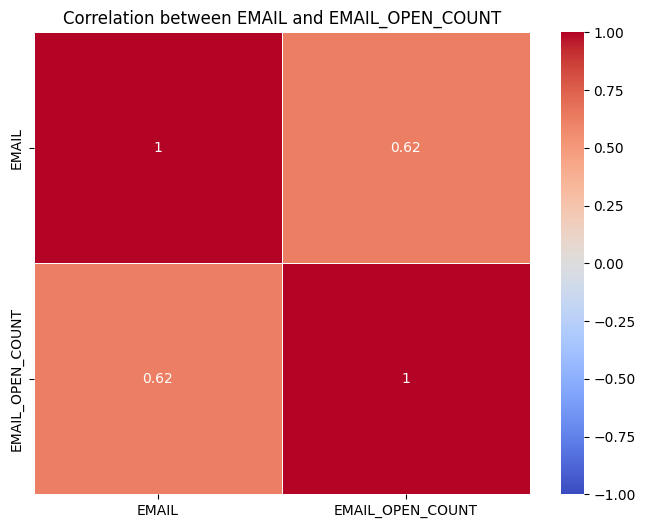

In [577]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation between EMAIL and EMAIL_OPEN_COUNT')
plt.show()


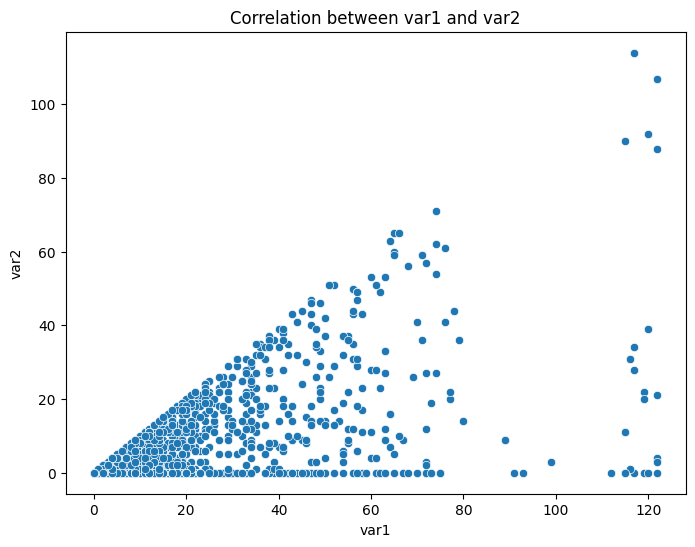

In [578]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="EMAIL", y="EMAIL_OPEN_COUNT", data=email_df)
plt.title("Correlation between var1 and var2")
plt.xlabel("var1")
plt.ylabel("var2")
plt.show()

In [579]:
email_df.head()

,EMAIL,EMAIL_OPEN_COUNT
CON_CRM_ID,,
0007vtu,4,3
000BANq,6,4
000C3T0,0,0
000PjW4,1,0
000RWdS,1,0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


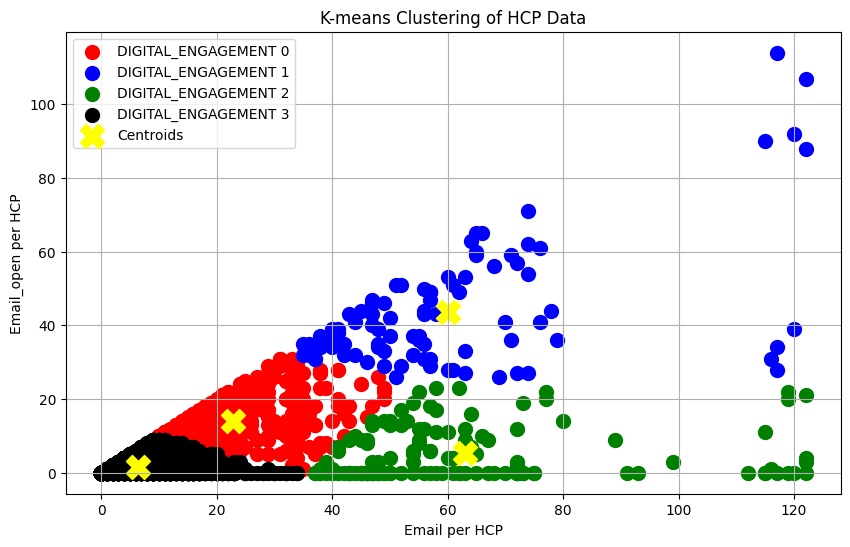

In [580]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


X = email_df[["EMAIL", "EMAIL_OPEN_COUNT"]]
df1 = pd.DataFrame(X)

# Standardizing the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df1)

# Applying K-means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
email_df['DIGITAL_ENGAGEMENT'] = kmeans.fit_predict(df_scaled)

# Plotting the clusters
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green', 'black']
for i in range(4):
    plt.scatter(email_df[email_df['DIGITAL_ENGAGEMENT'] == i]['EMAIL'],
                email_df[email_df['DIGITAL_ENGAGEMENT'] == i]['EMAIL_OPEN_COUNT'],
                s=100, c=colors[i], label=f'DIGITAL_ENGAGEMENT {i}')

# Plotting the centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='yellow', marker='X', label='Centroids')

plt.xlabel('Email per HCP')
plt.ylabel('Email_open per HCP')
plt.title('K-means Clustering of HCP Data')
plt.legend()
plt.grid(True)
plt.show()


In [581]:
from sklearn.metrics import silhouette_score
data = email_df
# Creating DataFrame
df = pd.DataFrame(data)

# Standardizing the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
silhouette_avg = silhouette_score(df_scaled, df['DIGITAL_ENGAGEMENT'])
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.7734052404772542


In [582]:
email_df.describe()

,EMAIL,EMAIL_OPEN_COUNT,DIGITAL_ENGAGEMENT
count,2134.000000,2134.000000,2134.000000
mean,14.798032,5.714152,2.353327
std,19.626899,10.634966,1.148103
min,0.000000,0.000000,0.000000
25%,2.000000,0.000000,2.000000
50%,9.000000,1.000000,3.000000
75%,18.000000,7.000000,3.000000
max,122.000000,114.000000,3.000000


In [583]:
digital_merged_df = pd.merge(digital_df, email_df, on='CON_CRM_ID', how='outer')


In [584]:
digital_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27119 entries, 0 to 27118
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CLUSTER_NAME        27119 non-null  object 
 1   MONTH_START_DATE    27119 non-null  object 
 2   THB_DATE            27119 non-null  object 
 3   BRAND               27119 non-null  object 
 4   CON_CRM_ID          27119 non-null  object 
 5   EMAIL_x             27119 non-null  int64  
 6   MSG                 27119 non-null  int64  
 7   CALL                27119 non-null  int64  
 8   VIDEO               27119 non-null  int64  
 9   DATE_TILL           27119 non-null  object 
 10  CTR                 27119 non-null  float64
 11  EMAIL_OPEN_COUNT_x  27119 non-null  int64  
 12  EMAIL_y             27119 non-null  int64  
 13  EMAIL_OPEN_COUNT_y  27119 non-null  int64  
 14  DIGITAL_ENGAGEMENT  27119 non-null  int32  
dtypes: float64(1), int32(1), int64(7), object(6)
memory u

In [585]:
digital_merged_df.sample(5)

,CLUSTER_NAME,MONTH_START_DATE,THB_DATE,BRAND,CON_CRM_ID,EMAIL_x,MSG,CALL,VIDEO,DATE_TILL,CTR,EMAIL_OPEN_COUNT_x,EMAIL_y,EMAIL_OPEN_COUNT_y,DIGITAL_ENGAGEMENT
25926,WEST BENGAL,1-Jul-23,11-Jul-23,FMI,8Nqa4gU,0,1,0,0,16-Mar-24,0.008741,0,0,0,3
9393,KARNATAKA,1-Oct-23,9-Oct-23,FMI,8Nvc2fa,1,0,0,0,16-Mar-24,0.000000,0,45,0,2
22227,MAHARASHTRA,1-Jul-23,10-Jul-23,TECENTRIQ,8NvHUGQ,1,0,0,0,16-Mar-24,0.000000,1,115,90,1
8123,KARNATAKA,1-Jul-23,25-Jul-23,TECENTRIQ,8Nupv6w,1,0,0,0,16-Mar-24,0.000000,0,79,36,1
26560,TAMIL NADU,1-Dec-23,12-Dec-23,TECENTRIQ,7U0lSdk,1,0,0,0,16-Mar-24,0.000000,1,10,1,3


In [586]:
digital_merged_df=digital_merged_df.drop(columns=['EMAIL_x','EMAIL_OPEN_COUNT_x'])

In [587]:
digital_merged_df[digital_merged_df['DIGITAL_ENGAGEMENT']==0].describe()

,MSG,CALL,VIDEO,CTR,EMAIL_y,EMAIL_OPEN_COUNT_y,DIGITAL_ENGAGEMENT
count,7068.000000,7068.000000,7068.0,7068.000000,7068.000000,7068.000000,7068.0
mean,0.168930,0.004527,0.0,0.013422,26.569468,15.254952,0.0
std,0.484118,0.076959,0.0,0.155449,9.419780,6.660611,0.0
min,0.000000,0.000000,0.0,0.000000,10.000000,1.000000,0.0
25%,0.000000,0.000000,0.0,0.000000,19.000000,10.000000,0.0
50%,0.000000,0.000000,0.0,0.000000,25.000000,14.000000,0.0
75%,0.000000,0.000000,0.0,0.000000,34.000000,20.000000,0.0
max,7.000000,2.000000,0.0,8.000000,49.000000,31.000000,0.0


In [588]:
digital_merged_df[digital_merged_df['DIGITAL_ENGAGEMENT']==1].describe()

,MSG,CALL,VIDEO,CTR,EMAIL_y,EMAIL_OPEN_COUNT_y,DIGITAL_ENGAGEMENT
count,4278.000000,4278.000000,4278.0,4278.000000,4278.000000,4278.000000,4278.0
mean,0.112436,0.001870,0.0,0.009857,65.548855,45.846424,1.0
std,0.428939,0.048318,0.0,0.105499,24.903580,19.158618,0.0
min,0.000000,0.000000,0.0,0.000000,35.000000,26.000000,1.0
25%,0.000000,0.000000,0.0,0.000000,48.000000,33.000000,1.0
50%,0.000000,0.000000,0.0,0.000000,58.000000,39.000000,1.0
75%,0.000000,0.000000,0.0,0.000000,74.000000,51.000000,1.0
max,7.000000,2.000000,0.0,2.000000,122.000000,114.000000,1.0


In [589]:
digital_merged_df[digital_merged_df['DIGITAL_ENGAGEMENT']==2].describe()

,MSG,CALL,VIDEO,CTR,EMAIL_y,EMAIL_OPEN_COUNT_y,DIGITAL_ENGAGEMENT
count,5847.000000,5847.000000,5847.0,5847.000000,5847.000000,5847.000000,5847.0
mean,0.146913,0.001026,0.0,0.001482,67.807936,5.544724,2.0
std,0.487757,0.041346,0.0,0.029301,25.606209,7.124234,0.0
min,0.000000,0.000000,0.0,0.000000,37.000000,0.000000,2.0
25%,0.000000,0.000000,0.0,0.000000,48.000000,0.000000,2.0
50%,0.000000,0.000000,0.0,0.000000,60.000000,1.000000,2.0
75%,0.000000,0.000000,0.0,0.000000,74.000000,10.000000,2.0
max,7.000000,2.000000,0.0,1.000000,122.000000,23.000000,2.0


In [590]:
digital_merged_df[digital_merged_df['DIGITAL_ENGAGEMENT']==3].describe()

,MSG,CALL,VIDEO,CTR,EMAIL_y,EMAIL_OPEN_COUNT_y,DIGITAL_ENGAGEMENT
count,9926.000000,9926.000000,9926.0,9926.000000,9926.000000,9926.000000,9926.0
mean,0.322889,0.025892,0.0,0.009233,10.925751,1.989019,3.0
std,0.624934,0.195760,0.0,0.121835,7.399723,2.465476,0.0
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,3.0
25%,0.000000,0.000000,0.0,0.000000,6.000000,0.000000,3.0
50%,0.000000,0.000000,0.0,0.000000,11.000000,1.000000,3.0
75%,1.000000,0.000000,0.0,0.000000,15.000000,4.000000,3.0
max,10.000000,4.000000,0.0,8.000000,34.000000,9.000000,3.0


In [591]:
digital_merged_df = digital_merged_df.rename(columns={
    'EMAIL_y': 'EMAIL',
    'EMAIL_OPEN_COUNT_y': 'EMAIL_OPEN_COUNT'
})

In [592]:
DIGITAL_MERGED_DF=digital_merged_df.copy()

DIGITAL_ENGAGEMENT CLUSTER ARE CREATED ON
EMAIL VS EMAIL_OPEN_COUNT


# POTENTIAL DATA

In [593]:

df1=Potential_data.copy()
df1['BI']=df1['PRODUCT']+"->"+df1['INDICATION']

le= LabelEncoder()
TEMP=pd.DataFrame(le.fit_transform(df1.BI),columns=['BI_Encoded'])
df1=pd.concat([df1,TEMP],axis=1)
df1.drop(['PRODUCT','INDICATION'],axis=1,inplace=True)
df1.columns

Index(['CLUSTER_NAME', 'CHANNEL', 'CON_CRM_ID', 'ACC_CRM_ID',
       'QUARTER_START_DATE', 'YEAR_START_DATE', 'MONTH_NAME', 'POTENTIAL',
       'ELIGIBLE_POTENTIAL', 'MTD', 'QTD', 'YTD', 'ELIGIBLE_POTENTIAL_MTD',
       'ELIGIBLE_POTENTIAL_QTD', 'ELIGIBLE_POTENTIAL_YTD', 'DATE_TILL',
       'USER_ID', 'BI', 'BI_Encoded'],
      dtype='object')

In [594]:
# List of Brand Indication and its encoded value (METADATA)\

Brand_Indication_Combination = df1[['BI','BI_Encoded']]
Brand_Indication_Combination.drop_duplicates(keep='first',inplace=True,ignore_index=True)
Brand_Indication_Combination.sort_values(by='BI_Encoded',ignore_index=True)

<ipython-input-594-4078d4884e57>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Brand_Indication_Combination.drop_duplicates(keep='first',inplace=True,ignore_index=True)


,BI,BI_Encoded
0,ALECENSA->1L ALK+ MNSCLC,0
1,ALECENSA->2L ALK+ MNSCLC,1
2,EVRYSDI->SMA TYPE I,2
3,EVRYSDI->SMA TYPE II,3
4,EVRYSDI->SMA TYPE III,4
5,GAZYVA->1L CLL,5
6,GAZYVA->RRFL,6
7,HEMLIBRA->FACTOR VIII INHIBITOR,7
8,HEMLIBRA->FACTOR VIII NON-INHIBITOR,8
9,KADCYLA->2L HER2 MBC,9


In [595]:
Potential_Final=df1[['CLUSTER_NAME','CHANNEL','CON_CRM_ID','POTENTIAL','BI','BI_Encoded']]
Potential_Final.head()

,CLUSTER_NAME,CHANNEL,CON_CRM_ID,POTENTIAL,BI,BI_Encoded
0,KARNATAKA,PRIVATE INSURANCE/OUT OF POCKET,7TyxgG8,0.1051,PERJETA->HER2 NEO ADJ,15
1,KARNATAKA,PRIVATE INSURANCE/OUT OF POCKET,7TyxgG8,0.1051,PERJETA->HER2 NEO ADJ,15
2,KARNATAKA,PRIVATE INSURANCE/OUT OF POCKET,7TyxgG8,0.1051,PERJETA->HER2 NEO ADJ,15
3,KARNATAKA,PRIVATE INSURANCE/OUT OF POCKET,7qgR4Mc,0.2142,TECENTRIQ->2L MNSCLC,24
4,KARNATAKA,PRIVATE INSURANCE/OUT OF POCKET,7qgR4Mc,0.2142,TECENTRIQ->2L MNSCLC,24


In [596]:
 Potential_Final.isnull().sum()

CLUSTER_NAME       0
CHANNEL            0
CON_CRM_ID      4640
POTENTIAL          0
BI                 0
BI_Encoded         0
dtype: int64

In [597]:
Potential_Final.shape

(80582, 6)

In [598]:
# Remove the duplicates and null values

Potential_Final.drop_duplicates(ignore_index=True,inplace=True)
Potential_Final.dropna(inplace=True)
Potential_Final.reset_index(drop=True, inplace=True)
Potential_Final.isnull().sum()

<ipython-input-598-4d03bb962b8e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Potential_Final.drop_duplicates(ignore_index=True,inplace=True)
<ipython-input-598-4d03bb962b8e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Potential_Final.dropna(inplace=True)


CLUSTER_NAME    0
CHANNEL         0
CON_CRM_ID      0
POTENTIAL       0
BI              0
BI_Encoded      0
dtype: int64

In [599]:
Potential_Final.head(5)

,CLUSTER_NAME,CHANNEL,CON_CRM_ID,POTENTIAL,BI,BI_Encoded
0,KARNATAKA,PRIVATE INSURANCE/OUT OF POCKET,7TyxgG8,0.1051,PERJETA->HER2 NEO ADJ,15
1,KARNATAKA,PRIVATE INSURANCE/OUT OF POCKET,7qgR4Mc,0.2142,TECENTRIQ->2L MNSCLC,24
2,TAMIL NADU,CGHS,7TyXLpI,0.0883,PHESGO->1L HER2 MBC,16
3,KERALA,ESI,7TxbByy,0.0591,PERJETA->HER2 ADJ,14
4,KERALA,ESI,7qb7ISg,0.0020,TECENTRIQ->MUC,27


In [600]:
pot_df=Potential_Final.groupby('CON_CRM_ID')['POTENTIAL'].mean().reset_index()

In [601]:
pot_df.head(5)

,CON_CRM_ID,POTENTIAL
0,000D5Ab,0.416667
1,000OE2J,6.000000
2,000SQ7Z,0.669000
3,000SYpS,0.771818
4,000ShLy,1.807273


In [602]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X=pot_df[['POTENTIAL']]


kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit_predict(pot_df[['POTENTIAL']])
pot_df['POTENTIAL_CLUSTER'] = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [603]:
pot_df.head(5)

,CON_CRM_ID,POTENTIAL,POTENTIAL_CLUSTER
0,000D5Ab,0.416667,0
1,000OE2J,6.000000,1
2,000SQ7Z,0.669000,0
3,000SYpS,0.771818,0
4,000ShLy,1.807273,0


In [604]:
potential_merged_df = pd.merge(Potential_Final, pot_df, on='CON_CRM_ID', how='outer')


In [605]:
potential_merged_df

,CLUSTER_NAME,CHANNEL,CON_CRM_ID,POTENTIAL_x,BI,BI_Encoded,POTENTIAL_y,POTENTIAL_CLUSTER
0,KARNATAKA,PRIVATE INSURANCE/OUT OF POCKET,7TyxgG8,0.105100,PERJETA->HER2 NEO ADJ,15,0.099197,0
1,KARNATAKA,PRIVATE INSURANCE/OUT OF POCKET,7TyxgG8,0.007000,TECENTRIQ->MUC,27,0.099197,0
2,KARNATAKA,PRIVATE INSURANCE/OUT OF POCKET,7TyxgG8,0.105100,PHESGO->HER2 NEO ADJ,18,0.099197,0
3,KARNATAKA,ESI,7TyxgG8,0.047500,GAZYVA->1L CLL,5,0.099197,0
4,KARNATAKA,CGHS,7TyxgG8,0.098100,KADCYLA->2L HER2 MBC,9,0.099197,0
...,...,...,...,...,...,...,...,...
55545,GUJARAT,STATE GOVT,00oPflG,0.166667,HEMLIBRA->FACTOR VIII NON-INHIBITOR,8,0.166667,0
55546,ANDHRA PRADESH AND TELANGANA,PRIVATE INSURANCE/OUT OF POCKET,7U4c0ZE,0.000000,TECENTRIQ->1L HCC,21,0.000000,0
55547,ANDHRA PRADESH AND TELANGANA,STATE GOVT,7U4c0ZE,0.000000,TECENTRIQ->1L HCC,21,0.000000,0
55548,DELHI AND HARYANA,DEFENCE & ECHS,00SsITq,6.890000,VABYSMO->DME,28,6.280000,1


In [606]:
potential_merged_df= potential_merged_df.drop(['POTENTIAL_y'],axis=1)

In [607]:
potential_merged_df = potential_merged_df.rename(columns={
    'POTENTIAL_x': 'POTENTIAL'

})

In [608]:
potential_merged_df[potential_merged_df['POTENTIAL_CLUSTER']==0].describe()

,POTENTIAL,BI_Encoded,POTENTIAL_CLUSTER
count,55076.000000,55076.000000,55076.0
mean,0.082004,15.758951,0.0
std,0.284396,8.038816,0.0
min,0.000000,0.000000,0.0
25%,0.002000,10.000000,0.0
50%,0.017300,16.000000,0.0
75%,0.063100,23.000000,0.0
max,22.720500,29.000000,0.0


In [609]:
potential_merged_df[potential_merged_df['POTENTIAL_CLUSTER']==1].describe()

,POTENTIAL,BI_Encoded,POTENTIAL_CLUSTER
count,426.000000,426.000000,426.0
mean,4.227220,25.272300,1.0
std,5.691342,7.512251,0.0
min,0.000000,2.000000,1.0
25%,1.200000,28.000000,1.0
50%,2.550000,28.000000,1.0
75%,4.964167,29.000000,1.0
max,54.395583,29.000000,1.0


In [610]:
potential_merged_df[potential_merged_df['POTENTIAL_CLUSTER']==2].describe()

,POTENTIAL,BI_Encoded,POTENTIAL_CLUSTER
count,48.000000,48.000000,48.0
mean,15.175347,20.625000,2.0
std,28.077515,10.286585,0.0
min,0.000000,7.000000,2.0
25%,1.265625,8.000000,2.0
50%,8.815000,28.000000,2.0
75%,21.025000,29.000000,2.0
max,186.437500,29.000000,2.0


In [611]:
potential_merged_df.sample(5)

,CLUSTER_NAME,CHANNEL,CON_CRM_ID,POTENTIAL,BI,BI_Encoded,POTENTIAL_CLUSTER
36140,MAHARASHTRA,PRIVATE INSURANCE/OUT OF POCKET,7U6rlfs,0.0620,TECENTRIQ->ADJ NSCLC,25,0
35098,ANDHRA PRADESH AND TELANGANA,PSU,08rdhYR,0.0183,PERJETA->HER2 ADJ,14,0
23639,ENTERPRISE STATE CLUSTER,PRIVATE INSURANCE/OUT OF POCKET,00DBCET,0.2856,TECENTRIQ->2L MNSCLC,24,0
41895,KARNATAKA,PRIVATE INSURANCE/OUT OF POCKET,7qbl21q,0.2523,PHESGO->HER2 NEO ADJ,18,0
5741,ENTERPRISE STATE CLUSTER,CGHS,7qdogz4,0.0008,PHESGO->1L HER2 MBC,16,0


In [612]:
POTENTIAL_MERGED_DF=potential_merged_df.copy()

In [613]:
Call_data.head(5)

,USER_ID,CLUSTER_NAME,BRAND,INDICATION,LOC_CONTACT_NAME,CON_CRM_ID,LOC_ACCOUNT_NAME,ACC_CRM_ID,CALLS,MONTH_START_DATE,...,CALL_OBJECTIVE,DISCUSSION_SUMMARY,FOLLOW_UP_ACTION,CON_PROF_TYPE,LAST_CALL_DATE,CRM_HCP_COUNT,CRM_NON_HCP_COUNT,NEW_HCP_FLAG,BELIEF_STATEMENT,BELIEF_SCORE
0,30134807.0,KARNATAKA,TECENTRIQ,[LEGACY] METASTATIC NON-SMALL CELL LUNG CANCER...,Viveka B K,8Nvc2fa,NaN,7qYRxo2,1,1-Jan-23,...,PRODUCT INFORMATION,SELECTION ON PATIENT’S IN REIMBURSEMENT,OTHER (CAPTURED IN THE DISCUSSION SUMMARY),Doctor,3-Oct-23,NaN,NaN,N,I beilieve there is a remarkable difference be...,3.0
1,30134807.0,KARNATAKA,TECENTRIQ,[LEGACY] METASTATIC NON-SMALL CELL LUNG CANCER...,Darling H S,7TyPvVQ,NaN,8Nmwj6Y,1,1-Jan-23,...,PRODUCT INFORMATION,REMINDER ON TECENTRIQ,OTHER (CAPTURED IN THE DISCUSSION SUMMARY),Doctor,11-Jan-23,NaN,NaN,N,NaN,NaN
2,30134807.0,KARNATAKA,TECENTRIQ,[LEGACY] METASTATIC NON-SMALL CELL LUNG CANCER...,Nidhi Tandon,7qay13q,NaN,7qWlkGo,1,1-Jan-23,...,PRODUCT INFORMATION,BELIEVES IN TECENTRIQ USE IN FIRST LINE IN MON...,OTHER (CAPTURED IN THE DISCUSSION SUMMARY),Doctor,16-Nov-23,NaN,NaN,N,I believe Tecentriq has higher OS in all high/...,5.0
3,30134807.0,KARNATAKA,TECENTRIQ,[LEGACY] METASTATIC NON-SMALL CELL LUNG CANCER...,Niti Raizada,7qcWk0w,NaN,7qYRxo2,1,1-Jan-23,...,PRODUCT INFORMATION,BELIEVES IN FIRST LINE IN PDL1 HIGH,OTHER (CAPTURED IN THE DISCUSSION SUMMARY),Doctor,4-Mar-24,NaN,NaN,N,I beilieve there is a remarkable difference be...,3.0
4,30134807.0,KARNATAKA,TECENTRIQ,[LEGACY] METASTATIC NON-SMALL CELL LUNG CANCER...,Pragnya Coca,7qir8ny,NaN,7qWlkGo,1,1-Jan-23,...,PRODUCT INFORMATION,TECENTRIQ 1ST LINE ISN’T COST EFFECTIVE FOR PA...,OTHER (CAPTURED IN THE DISCUSSION SUMMARY),Doctor,8-Mar-24,NaN,NaN,N,I believe Tecentriq is expensive but has good ...,5.0


In [614]:
Call_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93865 entries, 0 to 93864
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   USER_ID             93853 non-null  float64
 1   CLUSTER_NAME        93865 non-null  object 
 2   BRAND               93853 non-null  object 
 3   INDICATION          93865 non-null  object 
 4   LOC_CONTACT_NAME    90557 non-null  object 
 5   CON_CRM_ID          93865 non-null  object 
 6   LOC_ACCOUNT_NAME    0 non-null      float64
 7   ACC_CRM_ID          93865 non-null  object 
 8   CALLS               93865 non-null  int64  
 9   MONTH_START_DATE    93865 non-null  object 
 10  DAY_START_DATE      93865 non-null  object 
 11  CALL_OBJECTIVE      93865 non-null  object 
 12  DISCUSSION_SUMMARY  80672 non-null  object 
 13  FOLLOW_UP_ACTION    93854 non-null  object 
 14  CON_PROF_TYPE       90557 non-null  object 
 15  LAST_CALL_DATE      93853 non-null  object 
 16  CRM_

In [615]:
Npt_data

,CHANNEL,USER_ID,CLUSTER_NAME,BRAND,INDICATION,CON_CRM_ID,ACC_CRM_ID,NPT,MONTH_START_DATE,DAY_START_DATE,REPEAT_RX,REPEAT_BRAND_RX,NEW_RX,NEW_BRAND_RX,DATE_TILL,NPT_BELIEF_SCORE
0,PRIVATE INSURANCE/OUT OF POCKET,30087013,KARNATAKA,PHESGO,1L HER2 MBC,8NyQaSo,7TvpPCq,1,1-Jan-23,16-Jan-23,Y,Y,N,N,16-Mar-24,5.0
1,PRIVATE INSURANCE/OUT OF POCKET,30087013,KARNATAKA,PHESGO,HER2 NEO ADJ,8NyQaSo,7TvpPCq,1,1-Jan-23,25-Jan-23,Y,Y,N,N,16-Mar-24,4.0
2,PRIVATE INSURANCE/OUT OF POCKET,30087013,KARNATAKA,KADCYLA,HER2 EBC,8NyQaSo,7TvpPCq,1,1-Jan-23,4-Jan-23,Y,N,N,Y,16-Mar-24,4.0
3,ESI,369508,GUJARAT,TECENTRIQ,1L HCC,8NwfpcY,8NnACV8,1,1-Jan-23,24-Jan-23,N,N,N,Y,16-Mar-24,5.0
4,DEFENCE & ECHS,478850,PUNJAB AND CHANDIGARH,PHESGO,HER2 NEO ADJ,8NpZJGs,8NloT6o,1,1-Jan-23,10-Jan-23,Y,N,N,N,16-Mar-24,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9400,PRIVATE INSURANCE/OUT OF POCKET,30171674,ENTERPRISE STATE CLUSTER,VABYSMO,NAMD,01wdTcR,00xYcQr,2,1-Mar-24,5-Mar-24,Y,Y,N,N,16-Mar-24,2.0
9401,PRIVATE INSURANCE/OUT OF POCKET,30171674,ENTERPRISE STATE CLUSTER,VABYSMO,NAMD,01wdTcR,00xYcQr,2,1-Mar-24,7-Mar-24,Y,Y,N,N,16-Mar-24,2.0
9402,PRIVATE INSURANCE/OUT OF POCKET,30105228,KERALA,VABYSMO,OTHERS,02rY7AI,7qWECIs,1,1-Mar-24,9-Mar-24,N,N,Y,Y,16-Mar-24,NaN
9403,PRIVATE INSURANCE/OUT OF POCKET,30169422,DELHI AND HARYANA,POLIVY,RR DLBCL,8NvLgGA,8Nn7j3q,1,1-Mar-24,15-Mar-24,N,N,N,Y,16-Mar-24,NaN


<Axes: >

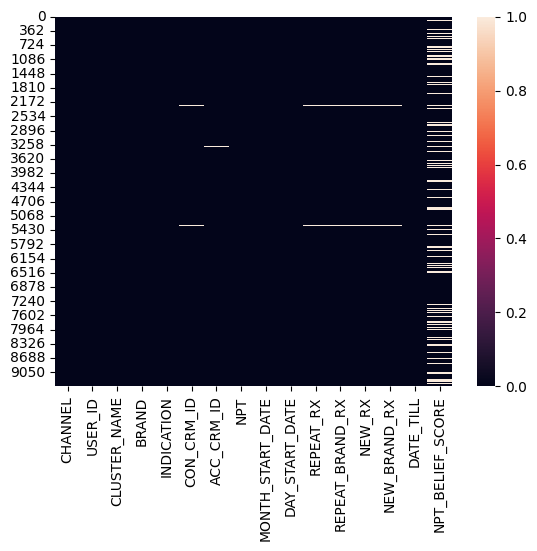

In [616]:
df1=Npt_data.copy()
sns.heatmap(df1.isnull())

In [617]:
# % of empty elements in belief score. I am going to try to fill it with values
df1.NPT_BELIEF_SCORE.isnull().sum()/len(df1)*100
# Since only 23% is missing, I'll Impute using MICE

23.870281765018607

<Axes: >

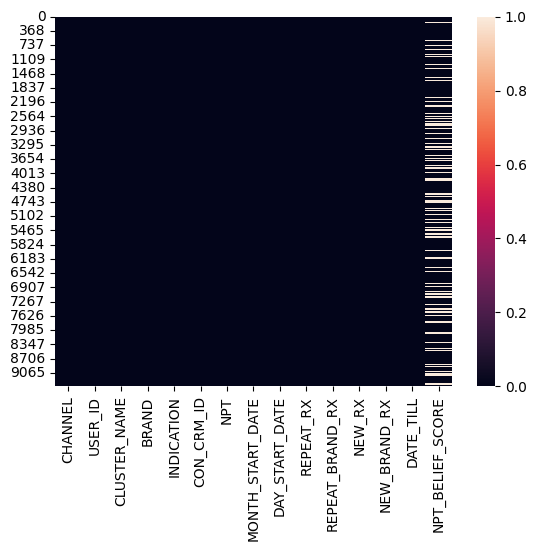

In [618]:
df1.dropna(subset=['CON_CRM_ID','REPEAT_RX','REPEAT_BRAND_RX','NEW_RX','NEW_BRAND_RX'],how='any',inplace=True)
df1.drop('ACC_CRM_ID',axis=1,inplace=True)
sns.heatmap(df1.isnull())

In [619]:
NPT_Predict_df = df1.copy()
NPT_Predict_df.drop(columns=['USER_ID','DATE_TILL','MONTH_START_DATE','DAY_START_DATE','DATE_TILL'],inplace=True)
NPT_Predict_df

,CHANNEL,CLUSTER_NAME,BRAND,INDICATION,CON_CRM_ID,NPT,REPEAT_RX,REPEAT_BRAND_RX,NEW_RX,NEW_BRAND_RX,NPT_BELIEF_SCORE
0,PRIVATE INSURANCE/OUT OF POCKET,KARNATAKA,PHESGO,1L HER2 MBC,8NyQaSo,1,Y,Y,N,N,5.0
1,PRIVATE INSURANCE/OUT OF POCKET,KARNATAKA,PHESGO,HER2 NEO ADJ,8NyQaSo,1,Y,Y,N,N,4.0
2,PRIVATE INSURANCE/OUT OF POCKET,KARNATAKA,KADCYLA,HER2 EBC,8NyQaSo,1,Y,N,N,Y,4.0
3,ESI,GUJARAT,TECENTRIQ,1L HCC,8NwfpcY,1,N,N,N,Y,5.0
4,DEFENCE & ECHS,PUNJAB AND CHANDIGARH,PHESGO,HER2 NEO ADJ,8NpZJGs,1,Y,N,N,N,3.0
...,...,...,...,...,...,...,...,...,...,...,...
9400,PRIVATE INSURANCE/OUT OF POCKET,ENTERPRISE STATE CLUSTER,VABYSMO,NAMD,01wdTcR,2,Y,Y,N,N,2.0
9401,PRIVATE INSURANCE/OUT OF POCKET,ENTERPRISE STATE CLUSTER,VABYSMO,NAMD,01wdTcR,2,Y,Y,N,N,2.0
9402,PRIVATE INSURANCE/OUT OF POCKET,KERALA,VABYSMO,OTHERS,02rY7AI,1,N,N,Y,Y,NaN
9403,PRIVATE INSURANCE/OUT OF POCKET,DELHI AND HARYANA,POLIVY,RR DLBCL,8NvLgGA,1,N,N,N,Y,NaN


In [620]:
NPT_Predict_df = df1.copy()
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore',sparse_output=False).set_output(transform='pandas')
X = ohe.fit_transform(NPT_Predict_df[['CHANNEL']])
NPT_Predict_df = pd.concat([NPT_Predict_df,X], axis=1).drop(columns = ['CHANNEL','CHANNEL_CGHS'])


In [621]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore',sparse_output=False).set_output(transform='pandas')
X = ohe.fit_transform(NPT_Predict_df[['CLUSTER_NAME']])
NPT_Predict_df = pd.concat([NPT_Predict_df,X], axis=1).drop(columns = ['CLUSTER_NAME','CLUSTER_NAME_ANDHRA PRADESH AND TELANGANA'])

In [622]:
NPT_Predict_df['PROIND']=NPT_Predict_df['BRAND']+"->"+NPT_Predict_df['INDICATION']


from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore',sparse_output=False).set_output(transform='pandas')
X = ohe.fit_transform(NPT_Predict_df[['PROIND']])
NPT_Predict_df=pd.concat([NPT_Predict_df,X],axis=1).drop(columns=['BRAND','INDICATION','CON_CRM_ID','PROIND','PROIND_ALECENSA->1L ALK+ MNSCLC'])

In [623]:
# Checking to see if we can remove one of the two (repeat and New rx)

from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
NPT_Predict_df.REPEAT_RX = le.fit_transform(NPT_Predict_df.REPEAT_RX)
NPT_Predict_df.NEW_RX = le.fit_transform(NPT_Predict_df.NEW_RX)
NPT_Predict_df.REPEAT_BRAND_RX = le.fit_transform(NPT_Predict_df.REPEAT_BRAND_RX)
NPT_Predict_df.NEW_BRAND_RX = le.fit_transform(NPT_Predict_df.NEW_BRAND_RX)

NPT_Predict_df.drop(['USER_ID','MONTH_START_DATE','DAY_START_DATE','DATE_TILL'],axis=1,inplace=True)
NPT_Predict_df

,NPT,REPEAT_RX,REPEAT_BRAND_RX,NEW_RX,NEW_BRAND_RX,NPT_BELIEF_SCORE,CHANNEL_DEFENCE & ECHS,CHANNEL_ESI,CHANNEL_PRIVATE INSURANCE/OUT OF POCKET,CHANNEL_PSU,...,PROIND_TECENTRIQ->ADJ NSCLC,PROIND_TECENTRIQ->BEYOND BRAND DISCUSSION,PROIND_TECENTRIQ->ES SCLC,PROIND_TECENTRIQ->MUC,PROIND_TECENTRIQ->NOT KNOWN,PROIND_TECENTRIQ->OTHERS,PROIND_TECENTRIQ->[LEGACY] METASTATIC NON-SMALL CELL LUNG CANCER (NSCLC),PROIND_VABYSMO->DME,PROIND_VABYSMO->NAMD,PROIND_VABYSMO->OTHERS
0,1,1,1,0,0,5.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,1,0,0,4.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,0,0,1,4.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0,1,5.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1,0,0,0,3.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9400,2,1,1,0,0,2.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9401,2,1,1,0,0,2.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9402,1,0,0,1,1,NaN,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9403,1,0,0,0,1,NaN,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [624]:
train_mice = NPT_Predict_df.copy(deep=True)

mice_Imputer = IterativeImputer()
train_mice['NPT_BELIEF_SCORE'] = mice_Imputer.fit_transform(train_mice[['NPT_BELIEF_SCORE']])
train_mice['NPT_BELIEF_SCORE'].isnull().sum()

0

In [625]:
df1['NPT_BELIEF_SCORE']=train_mice['NPT_BELIEF_SCORE']
NPT_Final=df1.copy(deep=True).drop(columns=['USER_ID'])
NPT_Final.drop_duplicates()
NPT_Final.head()

,CHANNEL,CLUSTER_NAME,BRAND,INDICATION,CON_CRM_ID,NPT,MONTH_START_DATE,DAY_START_DATE,REPEAT_RX,REPEAT_BRAND_RX,NEW_RX,NEW_BRAND_RX,DATE_TILL,NPT_BELIEF_SCORE
0,PRIVATE INSURANCE/OUT OF POCKET,KARNATAKA,PHESGO,1L HER2 MBC,8NyQaSo,1,1-Jan-23,16-Jan-23,Y,Y,N,N,16-Mar-24,5.0
1,PRIVATE INSURANCE/OUT OF POCKET,KARNATAKA,PHESGO,HER2 NEO ADJ,8NyQaSo,1,1-Jan-23,25-Jan-23,Y,Y,N,N,16-Mar-24,4.0
2,PRIVATE INSURANCE/OUT OF POCKET,KARNATAKA,KADCYLA,HER2 EBC,8NyQaSo,1,1-Jan-23,4-Jan-23,Y,N,N,Y,16-Mar-24,4.0
3,ESI,GUJARAT,TECENTRIQ,1L HCC,8NwfpcY,1,1-Jan-23,24-Jan-23,N,N,N,Y,16-Mar-24,5.0
4,DEFENCE & ECHS,PUNJAB AND CHANDIGARH,PHESGO,HER2 NEO ADJ,8NpZJGs,1,1-Jan-23,10-Jan-23,Y,N,N,N,16-Mar-24,3.0


In [626]:
df1=NPT_Final.copy()
df1['BI']=df1['BRAND']+"->"+df1['INDICATION']
df1.drop(['BRAND','INDICATION','MONTH_START_DATE','DAY_START_DATE','DATE_TILL'],axis=1,inplace=True)

In [627]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df1.REPEAT_RX = le.fit_transform(df1.REPEAT_RX)
df1.NEW_RX = le.fit_transform(df1.NEW_RX)
df1.REPEAT_BRAND_RX = le.fit_transform(df1.REPEAT_BRAND_RX)
df1.NEW_BRAND_RX = le.fit_transform(df1.NEW_BRAND_RX)

In [628]:
NPT_Final=df1.drop(['REPEAT_RX','REPEAT_BRAND_RX','NEW_RX','NEW_BRAND_RX'],axis=1)

In [629]:
NPT_Final.head()

,CHANNEL,CLUSTER_NAME,CON_CRM_ID,NPT,NPT_BELIEF_SCORE,BI
0,PRIVATE INSURANCE/OUT OF POCKET,KARNATAKA,8NyQaSo,1,5.0,PHESGO->1L HER2 MBC
1,PRIVATE INSURANCE/OUT OF POCKET,KARNATAKA,8NyQaSo,1,4.0,PHESGO->HER2 NEO ADJ
2,PRIVATE INSURANCE/OUT OF POCKET,KARNATAKA,8NyQaSo,1,4.0,KADCYLA->HER2 EBC
3,ESI,GUJARAT,8NwfpcY,1,5.0,TECENTRIQ->1L HCC
4,DEFENCE & ECHS,PUNJAB AND CHANDIGARH,8NpZJGs,1,3.0,PHESGO->HER2 NEO ADJ


In [630]:
main_npt = NPT_Final.copy()

In [631]:
train_mice = Call_data.copy(deep=True)

mice_Imputer = IterativeImputer()
Call_data['BELIEF_SCORE'] = mice_Imputer.fit_transform(train_mice[['BELIEF_SCORE']])
Call_data['BELIEF_SCORE'].isnull().sum()

0

In [632]:
Call_data = Call_data.groupby('CON_CRM_ID')['BELIEF_SCORE'].mean()

In [633]:
Call_data.sample(5)

CON_CRM_ID
032sh94    4.217304
0DmSofZ    4.431590
7TyLwIS    4.217304
006wVOc    3.937809
01YrZt3    3.863179
Name: BELIEF_SCORE, dtype: float64

In [634]:
NPT_Final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9315 entries, 0 to 9404
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CHANNEL           9315 non-null   object 
 1   CLUSTER_NAME      9315 non-null   object 
 2   CON_CRM_ID        9315 non-null   object 
 3   NPT               9315 non-null   int64  
 4   NPT_BELIEF_SCORE  9315 non-null   float64
 5   BI                9315 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 767.5+ KB


In [635]:
import pandas as pd

data1 = Call_data

data2 = NPT_Final

# Create DataFrames
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

# Merge DataFrames on 'CON_CRM_ID'
merged_df = pd.merge(df2, df1, on='CON_CRM_ID', how='left')

print(merged_df)


                              CHANNEL              CLUSTER_NAME CON_CRM_ID  \
0     PRIVATE INSURANCE/OUT OF POCKET                 KARNATAKA    8NyQaSo   
1     PRIVATE INSURANCE/OUT OF POCKET                 KARNATAKA    8NyQaSo   
2     PRIVATE INSURANCE/OUT OF POCKET                 KARNATAKA    8NyQaSo   
3                                 ESI                   GUJARAT    8NwfpcY   
4                      DEFENCE & ECHS     PUNJAB AND CHANDIGARH    8NpZJGs   
...                               ...                       ...        ...   
9310  PRIVATE INSURANCE/OUT OF POCKET  ENTERPRISE STATE CLUSTER    01wdTcR   
9311  PRIVATE INSURANCE/OUT OF POCKET  ENTERPRISE STATE CLUSTER    01wdTcR   
9312  PRIVATE INSURANCE/OUT OF POCKET                    KERALA    02rY7AI   
9313  PRIVATE INSURANCE/OUT OF POCKET         DELHI AND HARYANA    8NvLgGA   
9314  PRIVATE INSURANCE/OUT OF POCKET                    KERALA    7qcyaDS   

      NPT  NPT_BELIEF_SCORE                    BI  BELIEF_SCORE

In [636]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9315 entries, 0 to 9314
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CHANNEL           9315 non-null   object 
 1   CLUSTER_NAME      9315 non-null   object 
 2   CON_CRM_ID        9315 non-null   object 
 3   NPT               9315 non-null   int64  
 4   NPT_BELIEF_SCORE  9315 non-null   float64
 5   BI                9315 non-null   object 
 6   BELIEF_SCORE      9281 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 509.5+ KB


In [637]:
train_mice = Call_data.copy(deep=True)

mice_Imputer = IterativeImputer()
merged_df['BELIEF_SCORE'] = mice_Imputer.fit_transform(merged_df[['BELIEF_SCORE']])
merged_df['BELIEF_SCORE'].isnull().sum()

0

In [638]:
merged_df = merged_df.drop(columns='NPT_BELIEF_SCORE')

In [639]:
NPT_Final =merged_df.copy()

In [640]:

npt_per_hcp = NPT_Final.groupby('CON_CRM_ID')['NPT'].sum()
beliefscore_per_hcp= NPT_Final.groupby('CON_CRM_ID')['BELIEF_SCORE'].mean()


In [641]:

series1 = pd.Series(beliefscore_per_hcp, name="BELIEF_SCORE_PER_HCP")
series2 = pd.Series(npt_per_hcp, name="NPT_PER_HCP")

df = pd.concat([series1, series2], axis=1)


In [642]:
df

,BELIEF_SCORE_PER_HCP,NPT_PER_HCP
CON_CRM_ID,,
000BANq,2.684216,1
000OE2J,3.677206,5
000SYpS,3.493245,1
000XVJ8,3.944028,13
000Zlxk,4.550611,1
...,...,...
DytsXZV,3.675194,11
E6f24YG,4.205923,3
EZwNnqu,4.016279,8


In [643]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df[["BELIEF_SCORE_PER_HCP"]])
df['BELIEF_CLUSTER'] = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [644]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df[["NPT_PER_HCP"]])
df['NPT_CLUSTER'] = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [645]:
df.head(5).reset_index()

,CON_CRM_ID,BELIEF_SCORE_PER_HCP,NPT_PER_HCP,BELIEF_CLUSTER,NPT_CLUSTER
0,000BANq,2.684216,1,1,0
1,000OE2J,3.677206,5,0,0
2,000SYpS,3.493245,1,0,0
3,000XVJ8,3.944028,13,0,2
4,000Zlxk,4.550611,1,2,0


In [646]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1513 entries, 000BANq to EezpdHg
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BELIEF_SCORE_PER_HCP  1513 non-null   float64
 1   NPT_PER_HCP           1513 non-null   int64  
 2   BELIEF_CLUSTER        1513 non-null   int32  
 3   NPT_CLUSTER           1513 non-null   int32  
dtypes: float64(1), int32(2), int64(1)
memory usage: 47.3+ KB


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


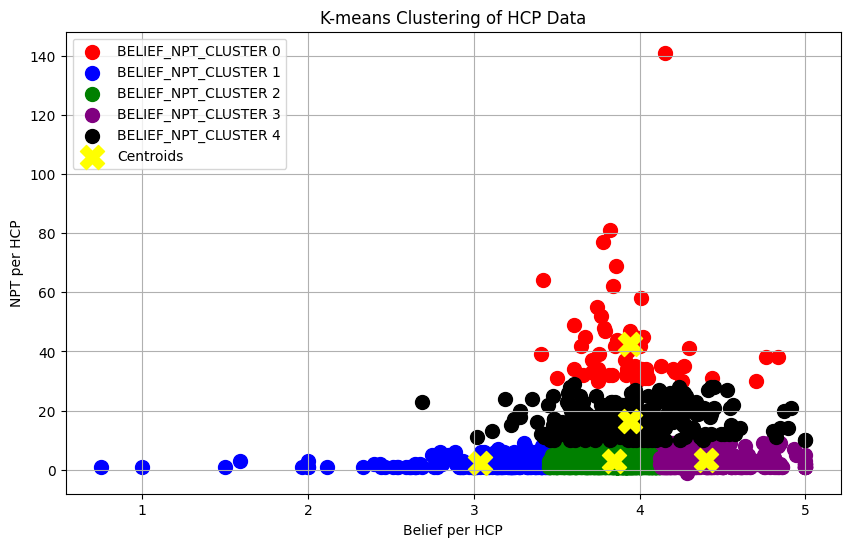

In [647]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Example data
data = df
# Creating DataFrame
df = pd.DataFrame(data)

# Standardizing the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Applying K-means clustering with 4 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
df['BELIEF_NPT_CLUSTER'] = kmeans.fit_predict(df_scaled)

# Plotting the clusters
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green', 'purple','black']
for i in range(5):
    plt.scatter(df[df['BELIEF_NPT_CLUSTER'] == i]['BELIEF_SCORE_PER_HCP'], df[df['BELIEF_NPT_CLUSTER'] == i]['NPT_PER_HCP'],
                s=100, c=colors[i], label=f'BELIEF_NPT_CLUSTER {i}')

# Plotting the centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='yellow', marker='X', label='Centroids')

plt.xlabel('Belief per HCP')
plt.ylabel('NPT per HCP')
plt.title('K-means Clustering of HCP Data')
plt.legend()
plt.grid(True)
plt.show()


In [648]:
from sklearn.metrics import silhouette_score
data = df
# Creating DataFrame
df = pd.DataFrame(data)

# Standardizing the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
silhouette_avg = silhouette_score(df_scaled, df['BELIEF_NPT_CLUSTER'])
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.7083998511615792


In [649]:
npt_merged_df = pd.merge(main_npt, df, on='CON_CRM_ID', how='outer')


In [650]:
NPT_MERGED_DF=npt_merged_df.copy()

# CLEAN AND FEATURE ENGINEERED DATA

In [651]:
EMS_MERGED_DF.head()

,CLUSTER_NAME,BRAND,START_DATE,MONTH_START_DATE,CON_CRM_ID,DATE_TILL,EVENTS,HONORARIUM,EMS_NUMBER,ROLE,TYPE,SPEAKER_CATEGORY,NO_OF_EVENT_ATTENDED,ENGAGEMENT_CLUSTER
0,KERALA,TECENTRIQ,19-Jan-23,1-Jan-23,7qZtCB0,7-Feb-24,1,22750,EMIN-202301-0006,Speaker,RIPE,Expert 3,6,2
1,KERALA,TECENTRIQ,17-Nov-23,1-Nov-23,7qZtCB0,7-Feb-24,1,0,EMIN-202311-0015,Panelist,RIPE,Expert 3,6,2
2,ANDHRA PRADESH AND TELANGANA,TECENTRIQ,27-Jan-23,1-Jan-23,8NxC0LK,7-Feb-24,1,21000,EMIN-202301-0015,Speaker,RIPE,Expert 3,21,0
3,ANDHRA PRADESH AND TELANGANA,FMI,27-Jan-23,1-Jan-23,8NxC0LK,7-Feb-24,1,21000,EMIN-202301-0015,Speaker,RIPE,Expert 3,21,0
4,ANDHRA PRADESH AND TELANGANA,TECENTRIQ,2-Mar-23,1-Mar-23,8NxC0LK,7-Feb-24,1,21000,EMIN-202303-0001,Panelist,RIPE,Expert 3,21,0


In [652]:
DIGITAL_MERGED_DF.head()

,CLUSTER_NAME,MONTH_START_DATE,THB_DATE,BRAND,CON_CRM_ID,MSG,CALL,VIDEO,DATE_TILL,CTR,EMAIL,EMAIL_OPEN_COUNT,DIGITAL_ENGAGEMENT
0,ANDHRA PRADESH AND TELANGANA,1-Jan-23,1-Jan-23,FMI,7U354Qq,0,0,0,16-Mar-24,0.0,22,12,0
1,ANDHRA PRADESH AND TELANGANA,1-Feb-23,27-Feb-23,FMI,7U354Qq,0,0,0,16-Mar-24,0.0,22,12,0
2,ANDHRA PRADESH AND TELANGANA,1-Mar-23,2-Mar-23,FMI,7U354Qq,0,0,0,16-Mar-24,0.0,22,12,0
3,ANDHRA PRADESH AND TELANGANA,1-May-23,23-May-23,FMI,7U354Qq,0,0,0,16-Mar-24,0.0,22,12,0
4,ANDHRA PRADESH AND TELANGANA,1-Apr-23,11-Apr-23,FMI,7U354Qq,0,0,0,16-Mar-24,0.0,22,12,0


In [653]:
POTENTIAL_MERGED_DF.head()

,CLUSTER_NAME,CHANNEL,CON_CRM_ID,POTENTIAL,BI,BI_Encoded,POTENTIAL_CLUSTER
0,KARNATAKA,PRIVATE INSURANCE/OUT OF POCKET,7TyxgG8,0.1051,PERJETA->HER2 NEO ADJ,15,0
1,KARNATAKA,PRIVATE INSURANCE/OUT OF POCKET,7TyxgG8,0.0070,TECENTRIQ->MUC,27,0
2,KARNATAKA,PRIVATE INSURANCE/OUT OF POCKET,7TyxgG8,0.1051,PHESGO->HER2 NEO ADJ,18,0
3,KARNATAKA,ESI,7TyxgG8,0.0475,GAZYVA->1L CLL,5,0
4,KARNATAKA,CGHS,7TyxgG8,0.0981,KADCYLA->2L HER2 MBC,9,0


In [654]:
NPT_MERGED_DF.head()

,CHANNEL,CLUSTER_NAME,CON_CRM_ID,NPT,NPT_BELIEF_SCORE,BI,BELIEF_SCORE_PER_HCP,NPT_PER_HCP,BELIEF_CLUSTER,NPT_CLUSTER,BELIEF_NPT_CLUSTER
0,PRIVATE INSURANCE/OUT OF POCKET,KARNATAKA,8NyQaSo,1,5.0,PHESGO->1L HER2 MBC,3.638515,25,0,2,4
1,PRIVATE INSURANCE/OUT OF POCKET,KARNATAKA,8NyQaSo,1,4.0,PHESGO->HER2 NEO ADJ,3.638515,25,0,2,4
2,PRIVATE INSURANCE/OUT OF POCKET,KARNATAKA,8NyQaSo,1,4.0,KADCYLA->HER2 EBC,3.638515,25,0,2,4
3,PRIVATE INSURANCE/OUT OF POCKET,KARNATAKA,8NyQaSo,1,4.0,PHESGO->HER2 NEO ADJ,3.638515,25,0,2,4
4,PRIVATE INSURANCE/OUT OF POCKET,KARNATAKA,8NyQaSo,1,4.0,PHESGO->HER2 NEO ADJ,3.638515,25,0,2,4
